In [55]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import skew, kurtosis
from scipy.stats import pearsonr, f_oneway
from statsmodels import api as sm
from statsmodels.formula.api import ols
# pearsonr for 2 continuos variables
# f_oneway, kruskal for categorical variables and continuous variables
# chi2_contingency for 2 categorical variables

from plotly import express as px
from plotly.figure_factory import create_distplot
from matplotlib import pyplot as plt
from matplotlib import style

style.use(['ggplot'])
%matplotlib inline

# **Load data**

In [4]:
data = pd.read_csv('tidy_data.csv')
data.head()

,name,Brand,Best Sellers Rank,weight,Laptop type,Laptop purpose,Screen Size,Hard Drive Size,Hard Drive Type,RAM speed,...,GPU,GPU performance,Optical Drive Type,Operating System,Number of USB 3.0 Ports,Number of USB 2.0 Ports,Date First Available,Customer Reviews,old_price,price
0,"samsung chromebook 4 (2021 model) 11.6"" intel ...",samsung,293.0,1.179340,traditional,general,13.3,32.0,other,2.133,...,intel uhd 600,1.8,No,chrome os,0.0,0.0,2021-06-26,4.2,139.99,100.0
1,"lenovo - chromebook 3 11"" chromebook - amd a6 ...",lenovo,256.0,1.587573,2 in 1,general,14.0,32.0,other,2.133,...,amd radeon r2,1.0,Yes,chrome os,2.0,0.0,2020-10-20,4.5,103.00,103.0
2,"newest flagship hp chromebook, 11.6"" hd (1366 ...",hp,86.0,1.356241,traditional,general,14.0,32.0,hybrid,1.866,...,intel hd 500,1.7,No,chrome os,1.0,0.0,2020-09-23,4.2,118.00,106.0
3,"samsung 11.6"" hd chromebook, intel celeron pro...",samsung,328.0,1.814369,traditional,general,13.3,32.0,ssd,2.500,...,intel hd,0.9,No,chrome os,2.0,1.0,2021-08-30,4.4,109.00,109.0
4,acer chromebook 512 laptop | intel celeron n40...,acer,15.0,1.401600,traditional,general,14.0,512.0,ssd,2.800,...,intel uhd 605,1.7,No,chrome os,4.0,1.0,2021-11-23,4.5,199.99,115.0


# **Visualize**

## **Numerous variables**

In [5]:
data.select_dtypes('float').corr()[(data.select_dtypes('float').corr()['price'] > 0.3) | (data.select_dtypes('float').corr()['price'] < -0.3)]['price']

weight             0.454281
Screen Size        0.332608
RAM size           0.381209
CPU rank          -0.652881
GPU performance    0.647743
old_price          0.986904
price              1.000000
Name: price, dtype: float64

### **Weight**

**Biểu đồ displot thể hiện xác suất mật độ phân phối các giá trị của dữ liệu biến 'weight'.**

In [6]:
create_distplot([data['price']], group_labels=['price'], show_hist=False)

In [7]:
create_distplot([data['weight']], group_labels=['weight'], show_hist=False)

**Biểu đồ histogram thể hiện phân phối dữ liệu của biến 'weight'.**

In [8]:
px.histogram(data['weight'], title='Distribution of weight', marginal="box")

*Nhận xét*:
+ Dữ liệu bị lệch trái 1 chút.
+ Đuôi khá dài.

Kết luận: dữ liệu gặp vấn đề về outlier.

Biến đổi biến định lượng 'weight' thành biến định tính để đánh giá mức độ ảnh hưởng đối với với biến 'price'.

In [9]:
data['weight_cate'] = pd.cut(data['weight'], 
                             bins=(0,1,1.5,2,2.5,10), 
                             labels=['Super light', 'Light', 'Normal', 'Heavy', 'Super Heavy'])

**Biểu đồ boxplot thể hiện phân phối dữ liệu của các loại giá trị phân biệt của biến 'weight' thông qua tứ phân vị.**

In [10]:
px.box(data, x='weight_cate', y='price', title='Boxplot of each weight to price').show()

*Nhận xét*: Nhìn qua thì biến weight ko ảnh hưởng nhiều đến biến price.

**Biểu đồ regresion plot thể hiện mối quan hệ tương tương quan giữa 2 biến 'weight' và 'price'.**

In [11]:
px.scatter(data, x='weight', y='price', title='Regression plot between weight and price', trendline='ols', trendline_color_override='red').show()

*Nhận xét*: Thông qua biểu đồ trên, ta thấy biến 'weight' có quan hệ tuyến tính khá tốt với biến 'price'. Song để khẳng định, ta dùng thêm phương thức pearsonr để kiểm tra.

**Sử dụng thang đo Pearsonr để đánh giá hệ số tương quan và mức độ chắc chắn của sự ảnh hưởng giữa 2 biến.**

In [12]:
print(f"Probability: {pearsonr(data['weight'], data['price'])[0]}\nP-value: {pearsonr(data['weight'], data['price'])[1]}")

Probability: 0.4542807288048143
P-value: 2.2155161810279165e-59


Kết quả:
+ Hệ số tương quan 0.45 < 0.5 -> hệ số tương quan không đủ lớn.
+ Xác suất p-value < 0.05 -> có thể khẳng định 2 biến có ảnh hưởng đến nhau, và ảnh hưởng này mang ý nghĩa thống kê.

**Biểu đồ residual plot thể hiện sự phân tán của các giá trị chênh lệch giữa 2 giá trị thực và giá trị được dự đoán.**

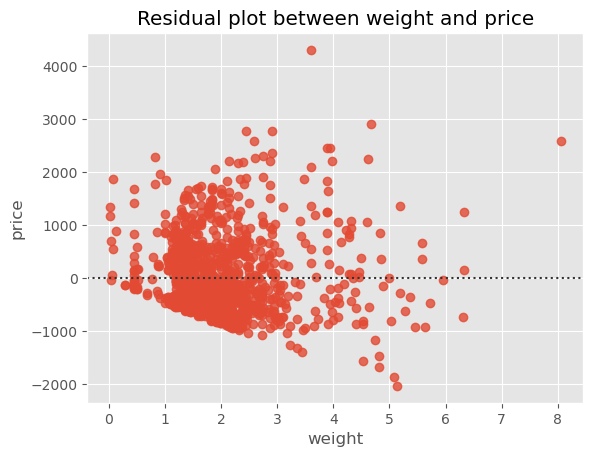

In [13]:
sns.residplot(data=data, x='weight', y='price')
plt.title('Residual plot between weight and price')
plt.show()

*Nhận xét*:
+ Dữ liệu khá tập trung gần trục x.
+ Song lại bị lệch hẳn sang phải.\
-> Ko quá phù hợp để phát triển mô hình.

**Kết luận**: biến weight có thể được dùng để phát triển mô hình.

### **RAM size**

**Biểu đồ displot thể hiện xác suất mật độ phân phối các giá trị của dữ liệu biến 'RAM size'.**

In [14]:
create_distplot(hist_data=[data['RAM size']], group_labels = ['RAM size'], show_hist=False)

**Biểu đồ histogram thể hiện phân phối dữ liệu của biến 'RAM size'.**

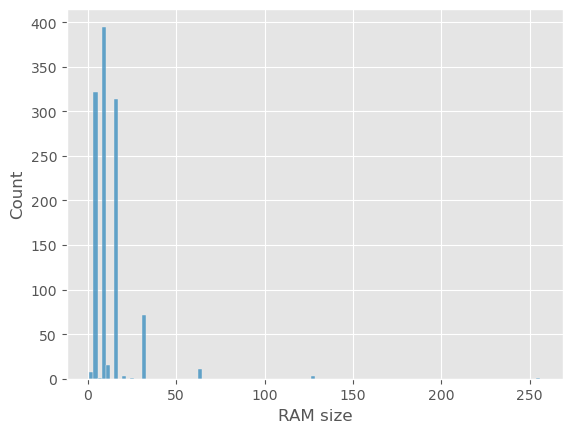

In [15]:
sns.histplot(data['RAM size']);

In [16]:
px.histogram(data['RAM size'], title='Histogram of RAM size', marginal='box' )

*Nhận xét*:
+ Bị lệch mạnh.
+ Đuôi rất dài.

--> Dữ liệu có vấn đề nghiêm trọng với outlier.

**Biểu đồ regression plot thể hiện mối quan hệ tương quan giữa 2 biến 'RAM size' và biến 'price'.**

In [17]:
px.scatter(data, x='RAM size', y='price', title='Regression plot between RAM Size and price', trendline='ols', trendline_color_override='red').show()

*Nhận xét*: Thông qua biểu đồ trên, ta thấy biến 'RAM size' có quan hệ tuyến tính không tốt với biến 'price'. Song để khẳng định, ta dùng thêm phương thức pearsonr để kiểm tra.

**Sử dụng thang đo Pearsonr để đánh giá hệ số tương quan và mức độ chắc chắn của sự ảnh hưởng giữa 2 biến.**

In [18]:
print(f"Probability: {pearsonr(data['RAM size'], data['price'])[0]}\nP-value: {pearsonr(data['RAM size'], data['price'])[1]}")

Probability: 0.38120940528060043
P-value: 6.531335663709888e-41


*Nhận xét*:
+ Hệ số tương quan 0.38 < 0.5 -> hệ số tương quan không đủ lớn, còn tệ hơn biến weight.
+ Xác suất p-value < 0.05 -> có thể khẳng định 2 biến có ảnh hưởng đến nhau, và ảnh hưởng này mang ý nghĩa thống kê.

**Biểu đồ residual plot thể hiện sự phân tán của các giá trị chênh lệch giữa 2 giá trị thực và giá trị được dự đoán.**

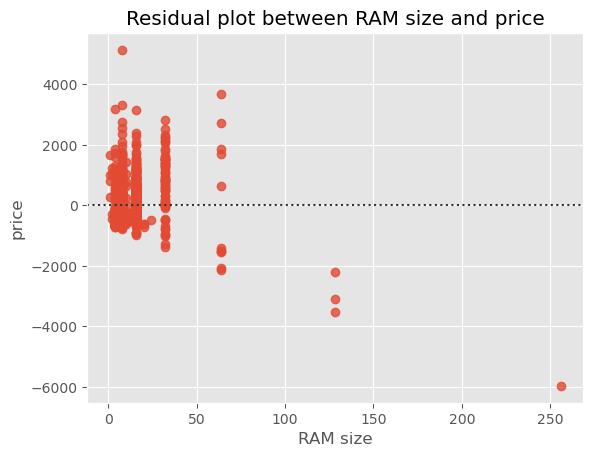

In [19]:
sns.residplot(data=data, x='RAM size', y='price')
plt.title('Residual plot between RAM size and price')
plt.show()

*Nhận xét*:
+ Các điểm ko tập trung quanh trục x.
+ Bị lệch cân bằng mạnh.

**Kết luận**: biến không phù hợp cho phát triển mô hình.

### CPU rank

**Biểu đồ displot thể hiện xác suất mật độ phân phối các giá trị của dữ liệu biến 'CPU rank'.**

In [20]:
create_distplot(hist_data=[data['CPU rank']], group_labels=['CPU rank'], show_hist=False)

**Biểu đồ histogram thể hiện phân phối dữ liệu của biến 'CPU rank'.**

In [21]:
px.histogram(data['CPU rank'], title='Histogram of CPU rank', marginal="box")

Nhận xét:
+ Dữ liệu không bị lệch nhiều.
+ Không có đuôi dài.

**Kết quả**: không có vấn đề với outlier.

**Biểu đồ regresion plot thể hiện mối quan hệ tương tương quan giữa 2 biến 'CPU rank' và 'price'.**

In [22]:
px.scatter(data['CPU rank'], title='Regression plot between CPU rank and Price', trendline='ols', trendline_color_override='red')

*Nhận xét*: thông qua biểu đồ trên ta thấy quan hệ tương quan khá ổn giữa 2 thuộc tính. Để chắc chắn ta sẽ kiểm tra.

**Sử dụng thang đo Pearsonr để đánh giá hệ số tương quan và mức độ chắc chắn của sự ảnh hưởng giữa 2 biến.**

In [23]:
print(f"Probability: {pearsonr(data['CPU rank'], data['price'])[0]}\nP-value: {pearsonr(data['CPU rank'], data['price'])[1]}")

Probability: -0.6528805993046514
P-value: 4.636286794688973e-140


*Nhận xét*:
+ Hệ số tương quan -0.65 < -0.5 -> hệ số tương quan ở mức khá.
+ Xác suất p-value < 0.05 -> có thể khẳng định 2 biến có ảnh hưởng đến nhau, và ảnh hưởng này mang ý nghĩa thống kê.

**Biểu đồ residual plot thể hiện sự phân tán của các giá trị chênh lệch giữa 2 giá trị thực và giá trị được dự đoán.**

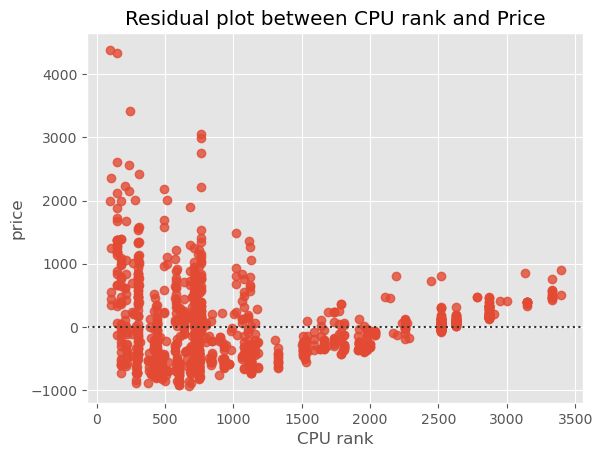

In [24]:
sns.residplot(data=data, x='CPU rank', y='price')
plt.title('Residual plot between CPU rank and Price')
plt.show()

*Nhận xét*:
+ Các điểm khá tập trung quanh trục x.
+ Bị lệch bên phải khá nhiều.

Kết luận: biến phù hợp cho phát triển mô hình.

### GPU performance

**Biểu đồ displot thể hiện xác suất mật độ phân phối các giá trị của dữ liệu biến 'GPU performance'.**

In [25]:
create_distplot(hist_data=[data['GPU performance']], group_labels=['GPU performance'], show_hist=False, show_rug=False)

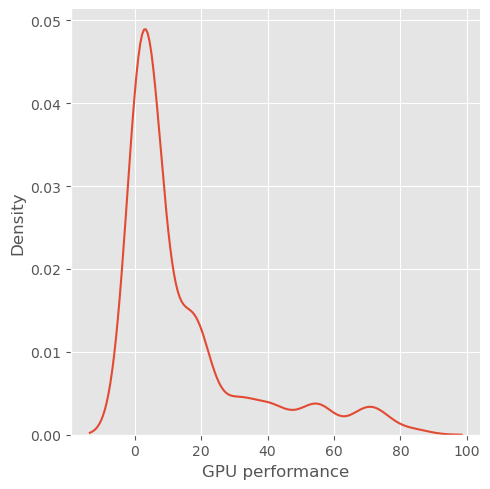

In [26]:
sns.displot(data['GPU performance'], kind='kde');

In [27]:
print(skew(data['GPU performance']))
print(kurtosis(data['GPU performance']))

1.7803074473941853
2.249323064646303


**Biểu đồ histogram thể hiện phân phối dữ liệu của biến 'GPU performance'.**

In [28]:
px.histogram(data['GPU performance'], marginal='box')

*Nhận xét*:
+ Dữ liệu bị lệch trái.
+ Có đuôi dài.

**Kết luận**: dữ liệu có vấn đề nhỏ với outlier.

**Biểu đồ regresion plot thể hiện mối quan hệ tương tương quan giữa 2 biến 'CPU rank' và 'price'.**

In [29]:
px.scatter(data['GPU performance'], title='Regression plot between GPU performance and Price', trendline='ols', trendline_color_override='red')

*Nhận xét*: thông qua biểu đồ trên, ta thấy mối quan hệ tương quan của 2 biến trên có thể không cao. Để kiểm chứng, ta sử dụng thông số Pearsonr.

**Sử dụng thang đo Pearsonr để đánh giá hệ số tương quan và mức độ chắc chắn của sự ảnh hưởng giữa 2 biến.**

In [30]:
print(f"Probability: {pearsonr(data['GPU performance'], data['price'])[0]}\nP-value: {pearsonr(data['GPU performance'], data['price'])[1]}")

Probability: 0.647743097714585
P-value: 3.49507733347137e-137


*Nhận xét*:
+ Hệ số tương quan 0.64 > 0.5 -> hệ số tương quan ở mức khá.
+ Xác suất p-value < 0.05 -> có thể khẳng định 2 biến có ảnh hưởng đến nhau, và ảnh hưởng này mang ý nghĩa thống kê.

**Biểu đồ residual plot thể hiện sự phân tán của các giá trị chênh lệch giữa 2 giá trị thực và giá trị được dự đoán.**

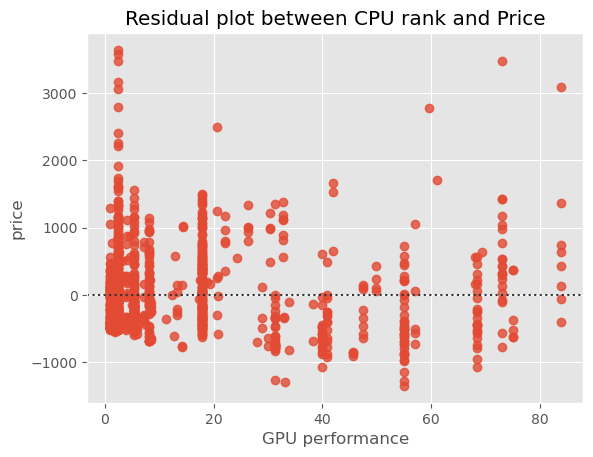

In [31]:
sns.residplot(data=data, x='GPU performance', y='price')
plt.title('Residual plot between CPU rank and Price')
plt.show()

*Nhận xét*:
+ Các điểm khá tập trung quanh trục x.
+ Các điểm tuy nằm không thật sự ngẫu nhiên nhưng có thể chấp nhận được.

**Kết luận**: biến phù hợp cho phát triển mô hình.

## **Categorical variables**

In [32]:
data.select_dtypes('object').columns

Index(['name', 'Brand', 'Laptop type', 'Laptop purpose', 'Hard Drive Type',
       'RAM type', 'CPU', 'GPU', 'Optical Drive Type', 'Operating System',
       'Date First Available'],
      dtype='object')

### **Brand**

**Biểu đồ Histogram thể hiện phân phối dữ liệu của biến 'Brand'.**

In [33]:
px.histogram(data['Brand'])

**Biểu đồ boxplot thể hiện phân phối dữ liệu của các loại giá trị phân biệt của biến 'Brand' thông qua tứ phân vị.**

In [34]:
px.box(data, x='Brand', y='price', title='Boxplot between Brand and Price', width=1000, height=700).show()

*Nhận xét*:
+ Chênh lệch về số lượng của các loại nhãn hiệu khá rõ khi nhìn vào biểu đồ histogram.
+ Chênh lệch về giá giữa các loại nhãn hiệu (Brand) lại khá rõ khi nhìn vào boxplot.
+ Nhưng 1 số nhãn hiệu lại có số lượng outlier chênh lệch giá khá cao

--> Ta nghi ngờ về sự ảnh hưởng của biến 'Brand' đối với biến 'price'.\
--> Để giải quyết nghi ngờ trên, dùng Anova test.

In [76]:
model = ols('price ~ Brand', data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Brand,2.319732e+08,13.0,37.295474,1.625574e-78
Residual,5.411293e+08,1131.0,NaN,NaN


In [35]:
anova_re = f_oneway(data[data['Brand']=='samsung']['price'], data[data['Brand']=='lenovo']['price'],
                    data[data['Brand']=='hp']['price'], data[data['Brand']=='acer']['price'],
                    data[data['Brand']=='asus']['price'], data[data['Brand']=='dell']['price'],
                    data[data['Brand']=='hyundai']['price'], data[data['Brand']=='microsoft']['price'],
                    data[data['Brand']=='dynabook']['price'], data[data['Brand']=='gigabyte']['price'],
                    data[data['Brand']=='msi']['price'], data[data['Brand']=='lg']['price'],
                    data[data['Brand']=='razer']['price'], data[data['Brand']=='toughbook']['price'])
print(f"P-value: {anova_re[1]}")

P-value: 1.625574491689565e-78


*Nhận xét*: vì giá trị của p-value < 0.05 nên ta có thể khẳng định giữa các loại giá trị thuộc biến 'Brand' có sự khác biệt về giá, sự khác biệt này mang ý nghĩa thống kê.

### Laptop type

**Biểu đồ Histogram thể hiện phân phối dữ liệu của biến 'Laptop type'.**

In [ ]:
px.histogram(data['Laptop type'])

**Biểu đồ boxplot thể hiện phân phối dữ liệu của các loại giá trị phân biệt của biến 'Laptop type' thông qua tứ phân vị.**

In [ ]:
px.box(data, x='Laptop type', y='price', title='Boxplot between Laptop type and Price', width=600)

Nhận xét:
+ Chênh lệch giữa 2 loại giá trị về số lượng vô cùng lớn.
+ Giữa 2 loại giá trị dường như không có sự khác biệt rõ ràng về giá.
+ Giá trị "traditional" có rất nhiều outlier với chênh lệch giá cực kỳ rõ ràng.

--> Ta nghi ngờ về sự ảnh hưởng của biến 'Laptop type' đối với biến 'price'.\
--> Để giải quyết nghi ngờ trên, dùng Anova test.

In [77]:
model = ols("price ~ Q('Laptop type')", data=data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Q('Laptop type'),1.020255e+07,1.0,15.285771,0.000098
Residual,7.629000e+08,1143.0,NaN,NaN


In [66]:
anova_re = f_oneway(data[data['Laptop type']=='traditional']['price'], data[data['Laptop type']=='2 in 1']['price'])
print(f"P-value: {anova_re[1]}")

P-value: 9.784556591514681e-05


*Nhận xét*: vì giá trị của p-value < 0.05 nên ta có thể khẳng định giữa các loại giá trị thuộc biến 'Laptop type' có sự khác biệt về giá, sự khác biệt này mang ý nghĩa thống kê.

### Laptop purpose

**Biểu đồ Histogram thể hiện phân phối dữ liệu của biến 'Laptop purpose'.**

In [ ]:
px.histogram(data['Laptop purpose'], width=700, height=550)

**Biểu đồ boxplot thể hiện phân phối dữ liệu của các loại giá trị phân biệt của biến 'Laptop purpose' thông qua tứ phân vị.**

In [ ]:
px.box(data, x='Laptop purpose', y='price', title='Boxplot between Laptop purpose and Price', width=600)

Nhận xét:
+ Chênh lệch về 2 loại giá trị của biến vô cùng lớn.
+ Dường như có sự khác biệt về giá giữa 2 loại giá trị của biến.
+ Nhưng giá trị 'general' có rất nhiều outlier với chênh lệch giá vô cùng rõ ràng.

--> Ta nghi ngờ về sự ảnh hưởng của biến 'Laptop purpose' đối với biến 'price'.\
--> Để giải quyết nghi ngờ trên, dùng Anova test.

In [ ]:
anova_re = f_oneway(data[data['Laptop purpose']=='general']['price'], data[data['Laptop purpose']=='gaming']['price'])
print(f"P-value: {anova_re[1]}")

P-value: 2.68848510513325e-31


*Nhận xét*: vì giá trị của p-value < 0.05 nên ta có thể khẳng định giữa các loại giá trị thuộc biến 'Laptop purpose' có sự khác biệt về giá, sự khác biệt này mang ý nghĩa thống kê.

### Hard Drive Type 

**Biểu đồ Histogram thể hiện phân phối dữ liệu của biến 'Hard Drive Type'.**

In [ ]:
px.histogram(data['Hard Drive Type'])

**Biểu đồ boxplot thể hiện phân phối dữ liệu của các loại giá trị phân biệt của biến 'Hard Drive Type' thông qua tứ phân vị.**

In [ ]:
px.box(data, x='Hard Drive Type', y='price')

Nhận xét:
+ Chênh lệch về số lượng giữa các loại giá trị của biến 'Hard Drive Type' rất lớn.
+ Nhưng dường như không có khác biệt về giá giữa các loại giá trị của biến.

Để kiểm chứng suy đoán trên, ta dùng Anova test.

In [ ]:
anova_re = f_oneway(data[data['Hard Drive Type']=='hybrid']['price'], data[data['Hard Drive Type']=='ssd']['price'],
                    data[data['Hard Drive Type']=='hdd']['price'], data[data['Hard Drive Type']=='other']['price'])
print(f"P-value: {anova_re[1]}")

P-value: 2.283030594899679e-13


*Nhận xét*: vì giá trị của p-value < 0.05 nên ta có thể khẳng định giữa các loại giá trị thuộc biến 'Hard Drive Type' có sự khác biệt về giá, sự khác biệt này mang ý nghĩa thống kê.

### RAM type

**Biểu đồ Histogram thể hiện phân phối dữ liệu của biến 'RAM type'.**

In [ ]:
px.histogram(data['RAM type'])

**Biểu đồ boxplot thể hiện phân phối dữ liệu của các loại giá trị phân biệt của biến 'RAM type' thông qua tứ phân vị.**

In [ ]:
px.box(data, x='RAM type', y='price')

Nhận xét:
+ Chênh lệch về số lượng giữa các loại giá trị của biến quá lớn, đặc biệt tập trung ở giá trị 'ddr4'.
+ Chênh lệch về giá giữa các loại giá trị của biến có thể được nhìn thấy.

--> Để kiểm chứng suy đoán trên, ta dùng Anova test.

In [ ]:
anova_re = f_oneway(data[data['RAM type']=='ddr4']['price'], data[data['RAM type']=='ddr']['price'],
                    data[data['RAM type']=='lpddr4']['price'], data[data['RAM type']=='ddr3l']['price'],
                    data[data['RAM type']=='lpddr3']['price'], data[data['RAM type']=='ddr3']['price'],
                    data[data['RAM type']=='sdram']['price'], data[data['RAM type']=='lpddr4x']['price'],
                    data[data['RAM type']=='ddr5']['price'], data[data['RAM type']=='ddr2']['price'],
                    data[data['RAM type']=='so-dimm']['price'], data[data['RAM type']=='lpddr5']['price'],
                    data[data['RAM type']=='dram']['price'], data[data['RAM type']=='gddr6']['price'],
                    data[data['RAM type']=='a8']['price'])
print(f"P-value: {anova_re[1]}")

P-value: 5.8907967648843286e-36


*Nhận xét*: vì giá trị của p-value < 0.05 nên ta có thể khẳng định giữa các loại giá trị thuộc biến 'RAM type' có sự khác biệt về giá, sự khác biệt này mang ý nghĩa thống kê.

### Optical Drive Type

**Biểu đồ Histogram thể hiện phân phối dữ liệu của biến 'Optical Drive Type'.**

In [ ]:
px.histogram(data['Optical Drive Type'])

**Biểu đồ boxplot thể hiện phân phối dữ liệu của các loại giá trị phân biệt của biến 'Optical Drive Type' thông qua tứ phân vị.**

In [ ]:
px.box(data, x='Optical Drive Type', y='price')

Nhận xét:
+ Chênh lệch về số lượng giữa các loại giá trị của biến rất lớn.
+ Nhưng dường như không có sự khác biệt về giá giữa 2 loại giá trị.

--> Để kiểm chứng suy đoán trên, ta dùng Anova test.

In [ ]:
anova_re = f_oneway(data[data['Optical Drive Type']=='No']['price'], data[data['Optical Drive Type']=='Yes']['price'])
print(f"P-value: {anova_re[1]}")

P-value: 0.3989836687182785


*Nhận xét*: vì giá trị của p-value < 0.05 nên ta có thể chấp nhận giả thuyết rằng giữa các loại giá trị thuộc biến 'Optical Drive Type' không có sự khác biệt về giá. Tức là biến 'Optical Drive Type' không có ảnh hưởng đáng kể lên biến 'price'.

### Operating System

**Biểu đồ Histogram thể hiện phân phối dữ liệu của biến 'Operating System'.**

In [ ]:
px.histogram(data['Operating System'])

**Biểu đồ boxplot thể hiện phân phối dữ liệu của các loại giá trị phân biệt của biến 'Brand' thông qua tứ phân vị.**

In [ ]:
px.box(data, x='Operating System', y='price')

Nhận xét:
+ Chênh lệch về số lượng giữa các loại giá trị của biến 'Operating System' khá lớn.
+ Đồng thời có thể thấy sự khác biệt về giá giữa các loại giá trị của biến.

Để kiểm chứng suy đoán trên, ta dùng Anova test.

In [ ]:
anova_re = f_oneway(data[data['Operating System']=='chrome os']['price'], data[data['Operating System']=='uninstalled']['price'],
                    data[data['Operating System']=='windows']['price'])
print(f"P-value: {anova_re[1]}")

P-value: 1.583521523121023e-42


*Nhận xét*: vì giá trị của p-value < 0.05 nên ta có thể khẳng định giữa các loại giá trị thuộc biến 'Operating System' có sự khác biệt về giá, sự khác biệt này mang ý nghĩa thống kê.

# Kết luận chọn feature

Các feature được chọn để phát triển mô hình:
+ Weight
+ CPU rank
+ GPU performance
+ Brand
+ Laptop type
+ Laptop purpose
+ Hard Drive Type
+ RAM type
+ Operating System